# Meeting 10/21/22

## Topics:

1. Python app
2. Spatial df
3. Uploading a feature layer

In [3]:
##############################
# Install modules if needed
##############################

!pip install arcgis --user
!pip install geopandas --user
!pip install fiona --user

# dependencies for geopandas
!pip install numpy --user
!pip install shapely --user
!pip install pyproj --user
!pip install packaging --user

In [6]:
# import modules
import numpy as np
# import geopandas as gpd
# import pandas as pd
# import arcgis
# from arcgis.gis import GIS, ContentManager
# from arcgis.mapping import WebMap, WebScene

ModuleNotFoundError: No module named 'numpy'

## Connect to ArcGIS Online (AGOL)

https://ky-cancer.maps.arcgis.com/home/

Content > my content > create folder > applications > Python

Spatial key for ArcGIS module
App ID: kjzMCmHCTjJYdlDy

In [207]:
app_id = 'kjzMCmHCTjJYdlDy'
gis = GIS("https://ky-cancer.maps.arcgis.com", client_id = app_id) # log-in to the AGOL 

Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://ky-cancer.maps.arcgis.com/sharing/rest/oauth2/authorize?response_type=code&client_id=kjzMCmHCTjJYdlDy&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=KVYTgNQi8y8lBZ00lY7PvrDUYBO3e3&allow_verification=false
Enter code obtained on signing in using SAML: ········


C:\Python39\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ky-cancer.maps.arcgis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [208]:
# define contentManager
contentManager = ContentManager(gis)

In [209]:
# search for "" in contentManager--does this just return all?
contentManager.search('')

[<Item title:"Hybrid County Basemap" type:Vector Tile Layer owner:todd.burus>,
 <Item title:"Behavioral Risk Factors" type:Service Definition owner:lee.park>,
 <Item title:"Basemap" type:Feature Layer Collection owner:todd.burus>,
 <Item title:"urban_region" type:Feature Layer Collection owner:todd.burus>,
 <Item title:"Environmental Indicators County" type:Feature Layer Collection owner:lee.park>,
 <Item title:"Tract Basemap" type:Feature Layer Collection owner:todd.burus>,
 <Item title:"all_site_inc_map_cover_outlined" type:Image owner:todd.burus>,
 <Item title:"ht_county : Vacancy Rate" type:Web Map owner:lee.park>,
 <Item title:"environment_county : PWS_Violations_Since_2016" type:Web Map owner:lee.park>,
 <Item title:"sociodemographics_county : Over 64" type:Web Map owner:lee.park>]

In [190]:
# get 2019 county file from TIGER
county = 'https://www2.census.gov/geo/tiger/TIGER2019/COUNTY/tl_2019_us_county.zip'

# read file as gdf
gdf = gpd.read_file(county)

# pull only columns 'GEOID' and 'geometry' as simple_gdf
simple_gdf = gdf.loc[:, ['GEOID','geometry']]

In [191]:
# show first results of simple_gdf
simple_gdf.head(3)

,GEOID,geometry
0,31039,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53069,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35011,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."


In [210]:
# examine data types in simple_gdf
simple_gdf.dtypes

GEOID         object
geometry    geometry
dtype: object

In [124]:
### NEW ###
# notes from https://www.youtube.com/watch?v=h1Lnz-rfWQo

# allows graphics to show in jupyter notebook
%matplotlib inline 

######################################
# create df using list of lists
######################################

data = [[1,2,3], [3,4,None]]
fields = ['field1', 'field2', 'field3']

# create df
df = pd.DataFrame(data, columns = fields)
df

######################################
# renaming all columns
######################################

gdf_renamed = gdf.rename(str.title, axis='columns')
gdf_renamed.head(3)

######################################
# exploring gdf
######################################

gdf.groupby('STATEFP').COUNTYFP.min() # group by STATEFP and then find min COUNTYFP per group

In [188]:
### NEW ###
# notes from https://www.youtube.com/watch?v=h1Lnz-rfWQo

######################################
# using os module
######################################

import os

url = 'https://en.wikipedia.org/wiki/Giant_panda'

tables = pd.read_html(url)

tables[1]

,Giant panda,Giant panda.1
0,"""Panda"" in Traditional (top) and Simplified (b...","""Panda"" in Traditional (top) and Simplified (b..."
1,Traditional Chinese,熊貓
2,Simplified Chinese,熊猫
3,Literal meaning,"""bear cat"""
4,TranscriptionsStandard MandarinHanyu Pinyinxió...,TranscriptionsStandard MandarinHanyu Pinyinxió...
5,Transcriptions,Transcriptions
6,Standard Mandarin,Standard Mandarin
7,Hanyu Pinyin,xióngmāo
8,Wade–Giles,hsiung2-mao1
9,IPA,[ɕjʊ̌ŋ.máʊ]


## Import our own dataset

In [192]:
import pickle
d = pickle.load(open('../dataset.pickle','rb')) # returns a dictionary
df = d['cancer_incidence'] # returns a dataframe for 'cancer_incidence' key
df2 = d['economy_county'] # returns a dataframe for 'economy_county' key

In [193]:
# drop index from df (cancer incidence dataframe)
df.reset_index(drop = False, inplace = True)

In [194]:
# display first few rows of df
df.head(3)

Site,FIPS,County,State,Type,All Site,Bladder,Brain & ONS,Cervix,Colon & Rectum,"Corpus Uteri & Uterus, NOS",...,Liver & IBD,Lung & Bronchus,Melanoma of the Skin,Non-Hodgkin Lymphoma,Oral Cavity & Pharynx,Ovary,Pancreas,Prostate,Stomach,Thyroid
0,33001,Belknap County,New Hampshire,Incidence,519.3,26.6,6.4,NaN,41.9,42.6,...,5.7,69.1,40.3,21.5,14.6,13.1,15.3,121.4,5.5,10.4
1,33003,Carroll County,New Hampshire,Incidence,465.0,26.2,8.3,NaN,35.7,28.6,...,5.4,57.6,33.8,17.3,13.5,9.0,12.4,127.1,4.5,9.9
2,33005,Cheshire County,New Hampshire,Incidence,471.2,23.2,6.3,NaN,37.7,30.4,...,8.0,59.2,40.4,20.8,10.0,10.7,13.2,95.6,5.5,9.5


In [195]:
##################################
# merge (add geometry variable)
################################## 

# interpretation: match the data from the column called "FIPS" in the left dataframe (df) and called "GEOID" in the right
# dataframe (simple_gdf), then drop the GEOID column entirely. (Axis = 1 means "column")

temp = df.merge(simple_gdf, how = 'left', left_on = 'FIPS', right_on = 'GEOID').drop('GEOID', axis = 1)
temp.head(3)

,FIPS,County,State,Type,All Site,Bladder,Brain & ONS,Cervix,Colon & Rectum,"Corpus Uteri & Uterus, NOS",...,Lung & Bronchus,Melanoma of the Skin,Non-Hodgkin Lymphoma,Oral Cavity & Pharynx,Ovary,Pancreas,Prostate,Stomach,Thyroid,geometry
0,33001,Belknap County,New Hampshire,Incidence,519.3,26.6,6.4,NaN,41.9,42.6,...,69.1,40.3,21.5,14.6,13.1,15.3,121.4,5.5,10.4,"POLYGON ((-71.70635 43.53762, -71.70691 43.538..."
1,33003,Carroll County,New Hampshire,Incidence,465.0,26.2,8.3,NaN,35.7,28.6,...,57.6,33.8,17.3,13.5,9.0,12.4,127.1,4.5,9.9,"POLYGON ((-71.32357 44.09161, -71.32294 44.091..."
2,33005,Cheshire County,New Hampshire,Incidence,471.2,23.2,6.3,NaN,37.7,30.4,...,59.2,40.4,20.8,10.0,10.7,13.2,95.6,5.5,9.5,"POLYGON ((-72.45946 43.02062, -72.45949 43.020..."


In [200]:
# not totally sure what this does--also throws an error that I don't think we're worried about
sdf = pd.DataFrame.spatial.from_geodataframe(temp, column_name = 'geometry')

sdf.head(3)

Error acquiring spatial reference from GeoDataFrame Spatial reference will not be set.'DataFrame' object has no attribute 'crs'


(-73.437905, 42.697041999999996, -70.57509399999999, 45.305778)

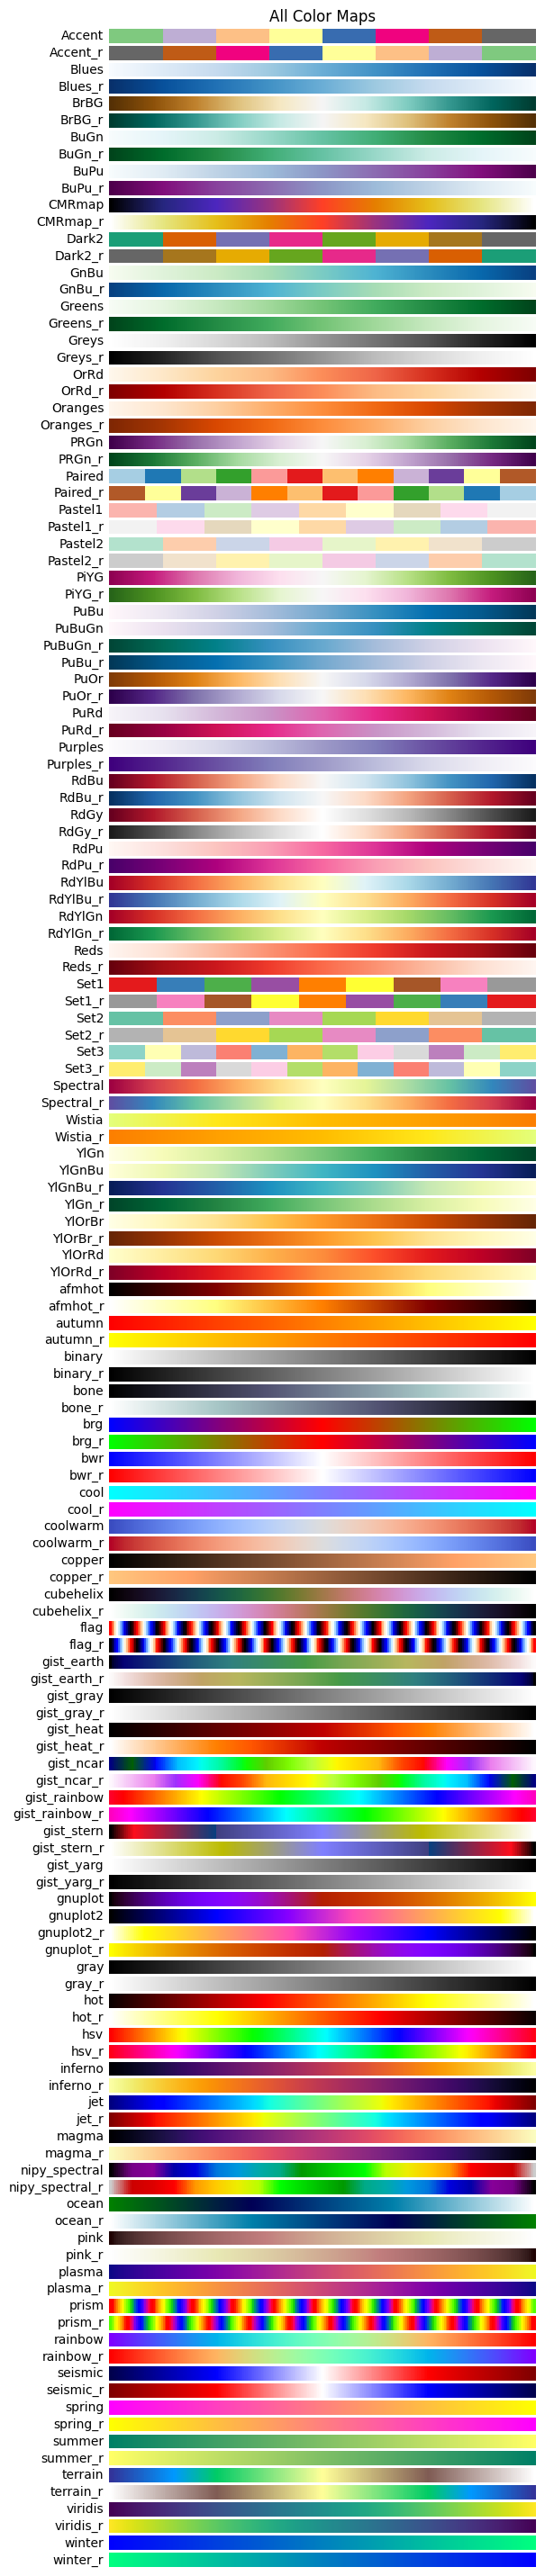

In [204]:
##################
# NEW
##################

from arcgis.mapping import show_styles, display_colormaps

sdf.spatial.bbox # should return "bounding box" for our full sdf

##################
# See available stypes and colors for mapping
##################
show_styles(geometry_type = 'POINT') # styles
display_colormaps() # colors

## Tutorial video: st

In [232]:
# adds feature layer "First Sample" to folder called "practice-folder"
lyrs = contentManager.import_data(sdf, title = 'First Sample', folder = "practice-folder")

In [231]:
# display feature layer
lyrs

<Item title:"First Sample" type:Feature Layer Collection owner:zch250@uky.edu>